## Convolution Neural Network (CNN)
In this notebook we show how to do the classification using a simple CNN. First we load the data and the necessary libraries.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np
import cPickle as pickle
import gzip
import time

with gzip.open('../mnist_4000.pkl.gz', 'rb') as f:
    (X,y) = pickle.load(f)
PIXELS = len(X[0,0,0,:])
X.shape, y.shape, PIXELS #X contains the images and y contains the labels.

((4000, 1, 28, 28), (4000,), 28)

## Reshapeing the data to fit TF
The data as loaded is in the form [batch, channel, width, height]. For convolutions in TensorFlow and thus TFLearn the tensors must be iin the form [batch, width, height, channel]. We therefore have to reshuffel. A note of warning, always check if you did the reshape correctly!

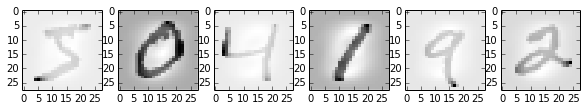

((4000, 28, 28, 1), array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int32))

In [3]:
X = X.reshape(X.shape[0], X.shape[2], X.shape[3], X.shape[1])
fig = plt.figure(figsize=(10,30))
for i in range(6):
    a=fig.add_subplot(1,6,(i+1))
    plt.imshow(-X[i,:,:,0], interpolation='none',cmap=plt.get_cmap('gray'))
plt.show()
X.shape, y[0:10]

### A first simple CNN
Now let's train a network using the loaded data. First we have to design the architecture of the network.
#### Definition of the network
We again use the simple definition using the class `NeuralNet` from `nolearn.lasagne` to create a network like this 

<img src="../imgs/lenet.png" width="700"/>

In [4]:
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

import tensorflow as tf
tf.reset_default_graph() 
network = input_data(shape=[None, PIXELS, PIXELS, 1], name='input')
network = conv_2d(network, 32, 3, activation='relu', padding='valid')
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 2, activation='relu', padding='valid')
network = max_pool_2d(network, 2)
network = fully_connected(network, 500, activation='relu')
network = fully_connected(network, 10, activation='softmax')
network = regression(network, optimizer='adam', learning_rate=0.01,
                     loss='categorical_crossentropy', name='target')

In [5]:
X_train = X[0:2400,:,:,:]
X_val   = X[2400:3000,:,:,:]
y_train = y[0:2400]
y_val = y[2400:3000]
# Taken from http://stackoverflow.com/questions/29831489/numpy-1-hot-array
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='int32')
    result[np.arange(len(vector)), vector] = 1
    return result

In [6]:
model = tflearn.DNN(network, tensorboard_verbose=0)
model.fit(X_inputs=X_train, 
          Y_targets=convertToOneHot(y_train, 10), 
          validation_set = (X_val, convertToOneHot(y_val, 10)),
          n_epoch=40,
          show_metric=True, 
          run_id="cnn_model",
         )

Training Step: 1520  | total loss: 0.00962
| Adam | epoch: 040 | loss: 0.00962 - acc: 0.9988 | val_loss: 0.59451 - val_acc: 0.9033 -- iter: 2400/2400
Training Step: 1520  | total loss: 0.00962
| Adam | epoch: 040 | loss: 0.00962 - acc: 0.9988 | val_loss: 0.59451 - val_acc: 0.9033 -- iter: 2400/2400
--


## Task 1 (Check dimension)

Open tensorboard and have a look at the graph. What are the dimensions of the tensors, from the input to the output layers. Does this make sense?

#### Task 1 (Solution)



We have a trained classifier with which we can make predictions.
## Task 2 (Evaluate the performance)
Evaluate the performance on the unseen data-set, examples 3000-4000.

In [1]:
y_probs = np.asarray(model.predict(X[3000:4000,]))
np.shape(y_probs)

### Your code here


NameError: name 'np' is not defined

## Task 3 (Learning Curve)

Look at the learning curve in tensorboard, do we have overfitting?

### Solution
